# Clinton Garayi HexSoftwares Project 1
## Exploratory Data Analysis (EDA) on a Public Dataset

### Introduction
##### Exploratory Data Analysis (EDA) is a step in the data science process that involves summarising, visualising, and interpreting data to uncover insights, patterns, and potential anomalies. In this case, our objective is to understand the structure of Gold/USD data, detect outliers or inconsistencies, and form hypotheses based on initial findings. EDA is carried out before advanced analytical methods and is crucial for ensuring that our data is clean, relevant, and ready for modelling or further analysis. By conducting EDA, we can ensure the integrity of the data and draw meaningful conclusions, hence paving the way for accurate modelling, deeper analysis, and sound decision making.

##### Data was obtained on kaggle (https://www.kaggle.com/datasets/novandraanugrah/xauusd-gold-price-historical-data-2004-2024). It was captured across multiple timeframes including 5-minute, 15-minute, 30-minute, 1-hour, 4-hour, daily, weekly, and monthly intervals. In this case we will only focus on the 4-hour timeframe. Dataset includes Open, High, Low, Close prices, and Volume data.

## 1. Loading the relevant libraries

In [69]:
# Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


## 2. Mounting the drive

In [70]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Data loading

In [71]:
# Loading the dataset into a DataFrame, the csv file for 4-hour time frame
data = pd.read_csv('/content/drive/MyDrive/HexSoftwares/XAU_4h_data_2004_to_2024-09-20.csv')


## 4. Understanding the data

##### We inspect its structure, this gives us a preliminary idea of the columns, data types, and potential issues.

In [72]:
# Displaying the first 5 rows of the DataFrame
data.head()

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,04:00,384.0,384.3,383.3,383.8,44
1,2004.06.11,08:00,383.8,384.3,382.8,383.6,152
2,2004.06.11,12:00,383.5,384.6,383.3,384.6,48
3,2004.06.11,16:00,384.3,384.8,383.8,384.1,28
4,2004.06.14,00:00,384.3,384.5,382.3,382.6,124


In [73]:
# Displaying the last 5 rows of the DataFrame
data.tail()

,Date,Time,Open,High,Low,Close,Volume
31026,2024.09.19,09:00,2574.51,2594.85,2573.85,2591.79,143314
31027,2024.09.19,13:00,2591.80,2591.82,2569.64,2574.75,212537
31028,2024.09.19,17:00,2574.74,2592.59,2571.68,2590.52,157518
31029,2024.09.19,21:00,2590.53,2590.73,2585.90,2586.12,41870
31030,2024.09.20,01:00,2586.13,2587.84,2585.84,2587.20,6672


In [74]:
# Displaying the shape of the DataFrame
data.shape

(31031, 7)

In [75]:
# Displaying the columns of the DataFrame
data.columns

Index(['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [76]:
# Displaying the number of unique values in each column
data.nunique()

,0
Date,5209
Time,12
Open,23764
High,23767
Low,23757
Close,23827
Volume,18485


In [77]:
# Display the unique times in the 'Time' column
data['Time'].unique()

array(['04:00', '08:00', '12:00', '16:00', '00:00', '20:00', '05:00',
       '09:00', '13:00', '17:00', '21:00', '01:00'], dtype=object)

## 5. Cleaning the data

#### This is crucial to ensure accuracy in analysis. Missing values, incorrect data types, or outliers can distort the results.

#### Handling missing values

In [78]:
# Checking for missing values in the DataFrame
data.isnull().sum()

,0
Date,0
Time,0
Open,0
High,0
Low,0
Close,0
Volume,0


## 6. Converting data types

---



#### We will ensure that Date and Time columns are combined into a DateTime object for accurate time-based analysis.

In [79]:
# Combining 'Date' and 'Time' into a single 'DateTime' column for easier time series analysis
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Dropping the original 'Date' and 'Time' columns to avoid redundancy
data = data.drop(columns=['Date', 'Time'])

# Setting 'DateTime' as the index of the DataFrame for time series operations
data = data.set_index('DateTime')


## 7. Basic statistical analysis

#### Descriptive statistics gives us a quick overview of the dataset, providing insights into central tendencies and spread.

#### We get measures like mean, standard deviation, minimum, and maximum values for numeric columns (such as Open, High, Low, Close, and Volume).

In [80]:
# Summary of statistics for numerical columns in the DataFrame
data.describe()

,Open,High,Low,Close,Volume
count,31031.000000,31031.000000,31031.000000,31031.000000,31031.000000
mean,1300.050437,1303.579544,1296.389009,1300.077852,12801.099223
std,472.395468,473.489925,471.251267,472.415879,14510.898821
min,382.300000,383.100000,381.100000,382.000000,1.000000
25%,973.400000,977.210000,969.300000,973.350000,2733.000000
50%,1285.900000,1288.540000,1283.200000,1285.880000,9400.000000
75%,1683.245000,1688.525000,1677.875000,1683.125000,17668.000000
max,2591.800000,2600.000000,2585.900000,2591.790000,335166.000000


## 8. Visualising data distributions

#### We visualise data as this can reveal trends, patterns, and anomalies that might not be obvious from raw numbers.



### Price Trend Over Time

#### We will plot the Close price to observe overall trends.

##### This helps us identify overall upward or downward trends, volatility, and potential turning points in the market.

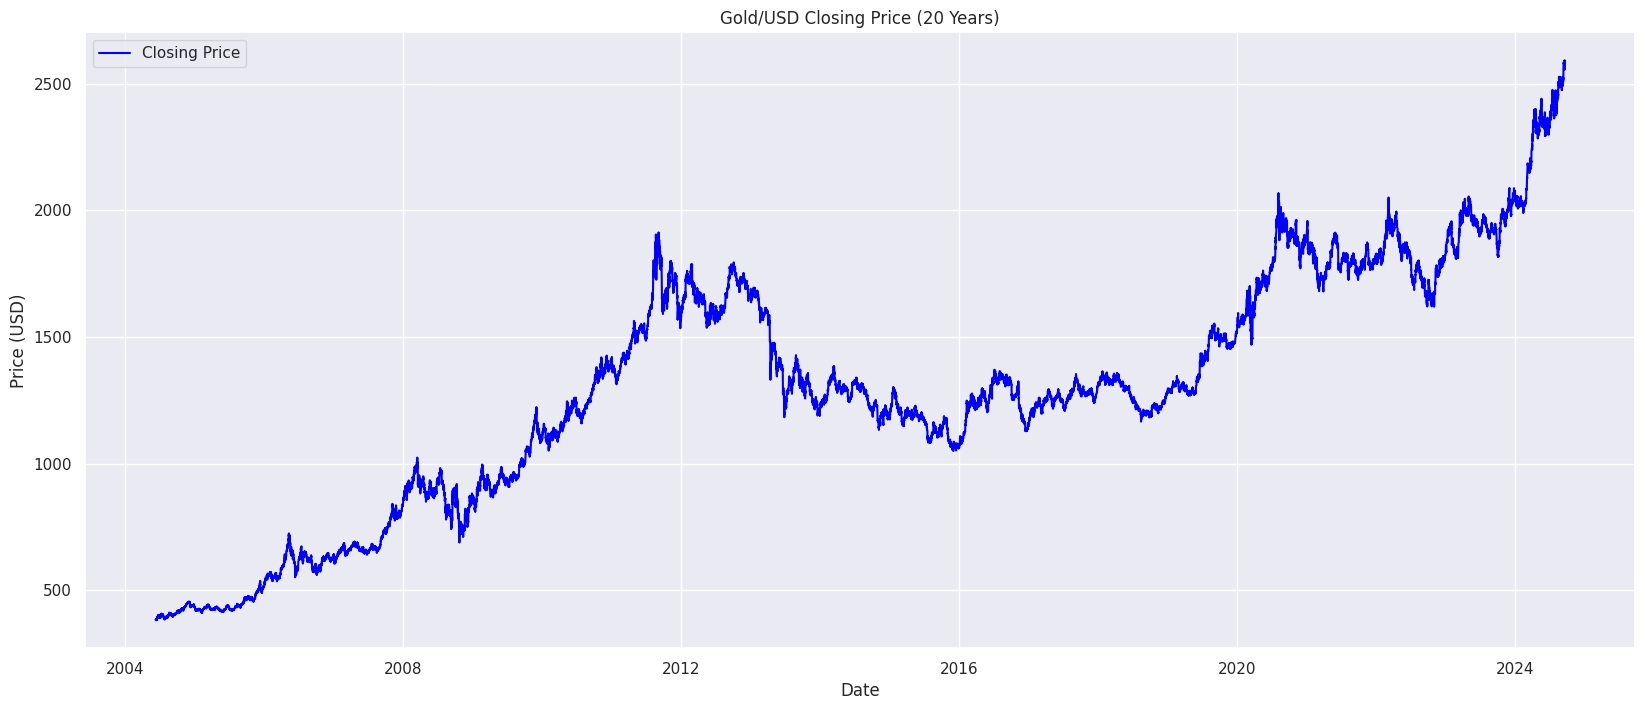

In [81]:
plt.figure(figsize=(20, 8))
plt.plot(data.index, data['Close'], label='Closing Price', linestyle = '-',color='blue')
plt.title('Gold/USD Closing Price (20 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
#plt.grid()
plt.show()

### Moving Average: We will calculate and plot moving averages to smoothen short-term fluctuations.

#### Moving averages are useful for identifying longer term trends and smoothing out short term noise in the data.

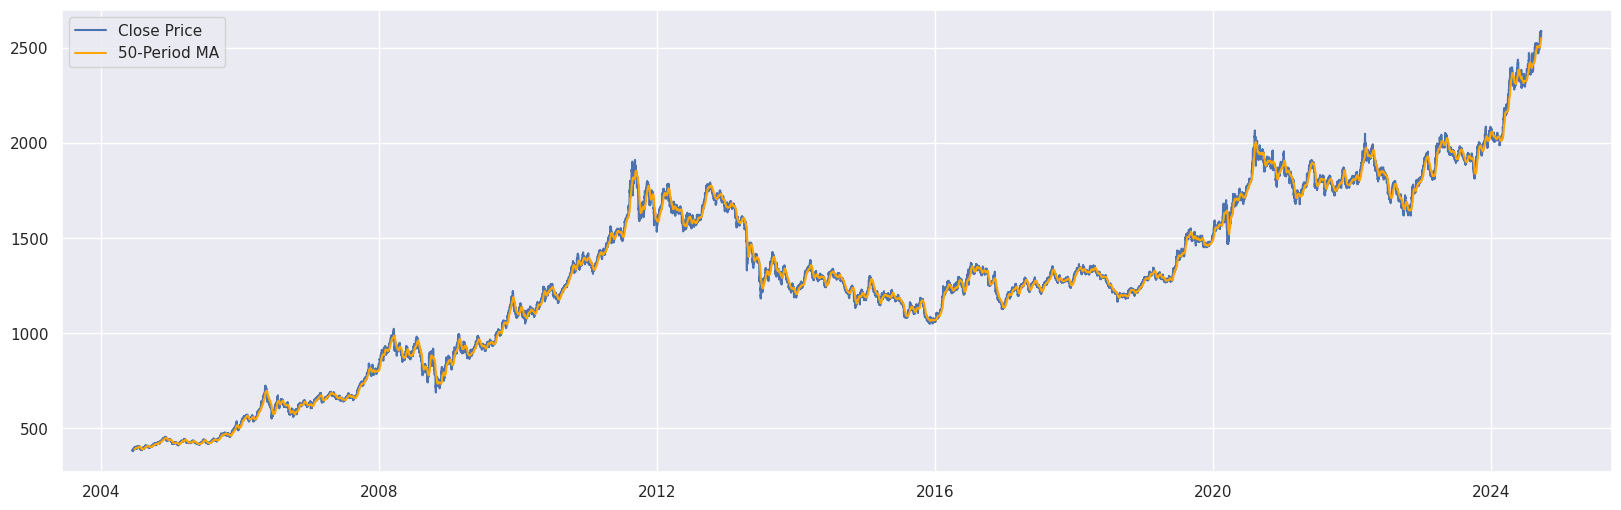

In [82]:
plt.figure(figsize=(20, 6))
data['Moving_Avg_50'] = data['Close'].rolling(window=50).mean()
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Moving_Avg_50'], label='50-Period MA', color='orange')
plt.legend()
plt.grid(True, zorder=10)
#plt.grid()
plt.show()


### Distribution of Prices: We will use histograms to understand how prices are distributed over time.

#### Price distribution shows whether the market has been trading in certain ranges more often and can indicate market behavior (frequent price spikes or stability)

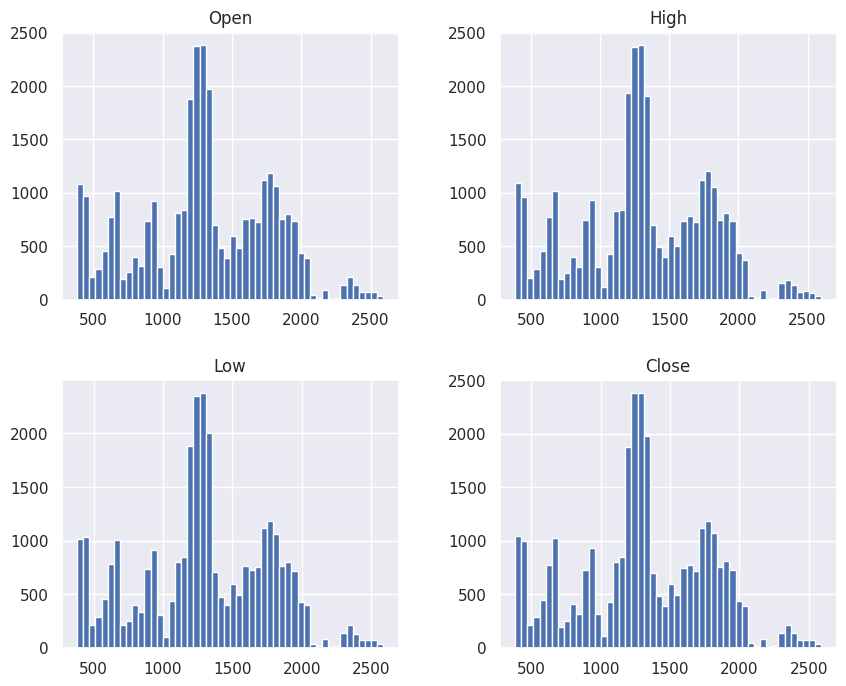

In [83]:
data[['Open', 'High', 'Low', 'Close']].hist(bins=50, figsize=(10, 8))
plt.show()

## 9. Correlation Analysis

#### This step helps us understand the relationships between different price variables (Open, High, Low, Close). Correlation measures how much one variable influences another.


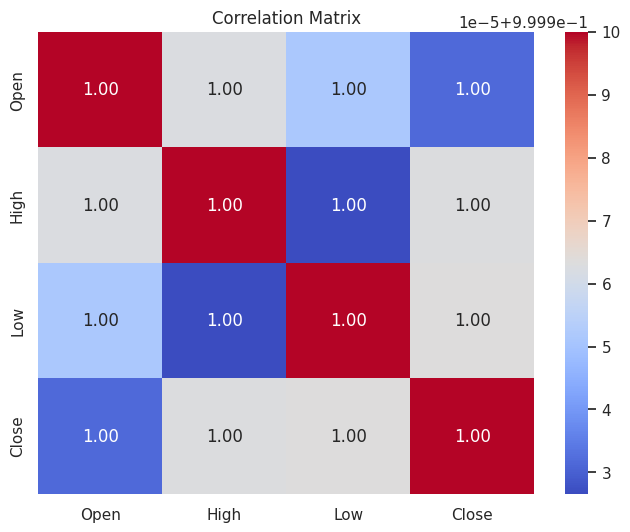

In [84]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

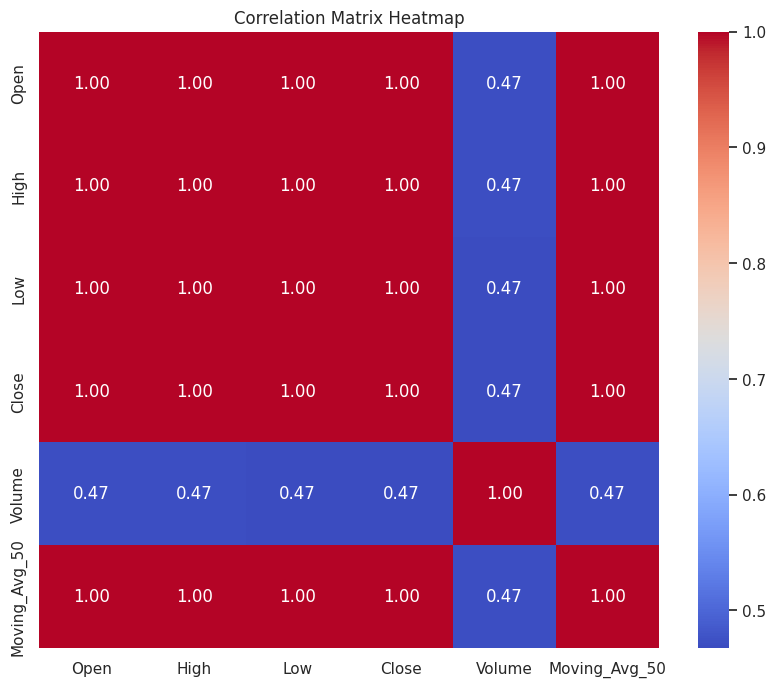

In [85]:


# Ensure that only numerical columns are selected
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


## 10. Volume Analysis

#### Analysing trading volume can reveal periods of high activity, which often coincide with market events or price volatility. Thus we are able to identify whether price changes are accompanied by spikes in volume, indicating a strong market sentiment or event.

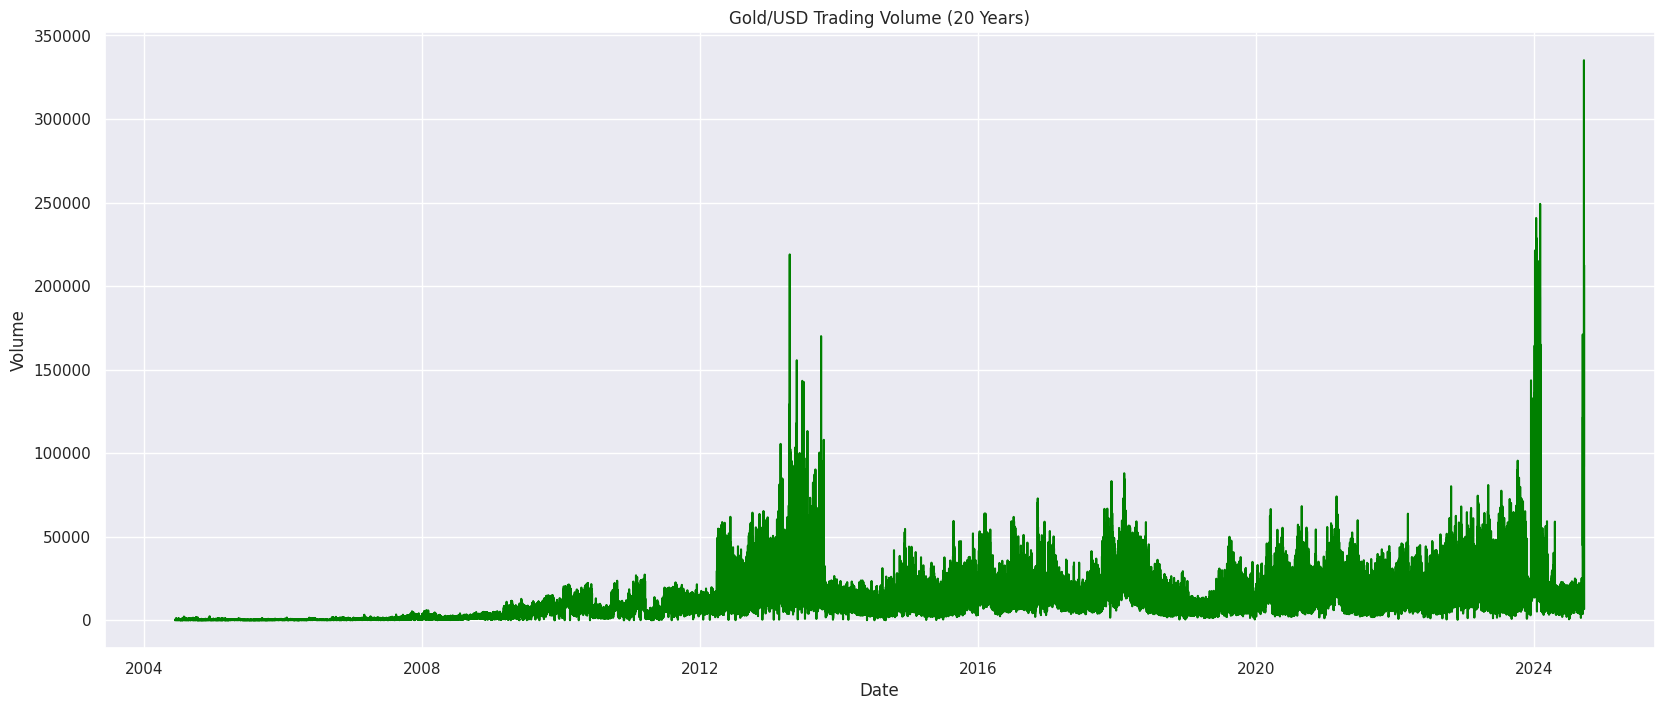

In [86]:
plt.figure(figsize=(20, 8))
plt.plot(data.index, data['Volume'], label='Volume', color='green')
plt.title('Gold/USD Trading Volume (20 Years)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## 11. Trend Analysis

##### Moving averages (like the 50-period and 200-period MA) can help us identify long-term trends and serve as support/resistance levels. Long-term moving averages help you filter out short-term fluctuations and focus on overall trends.

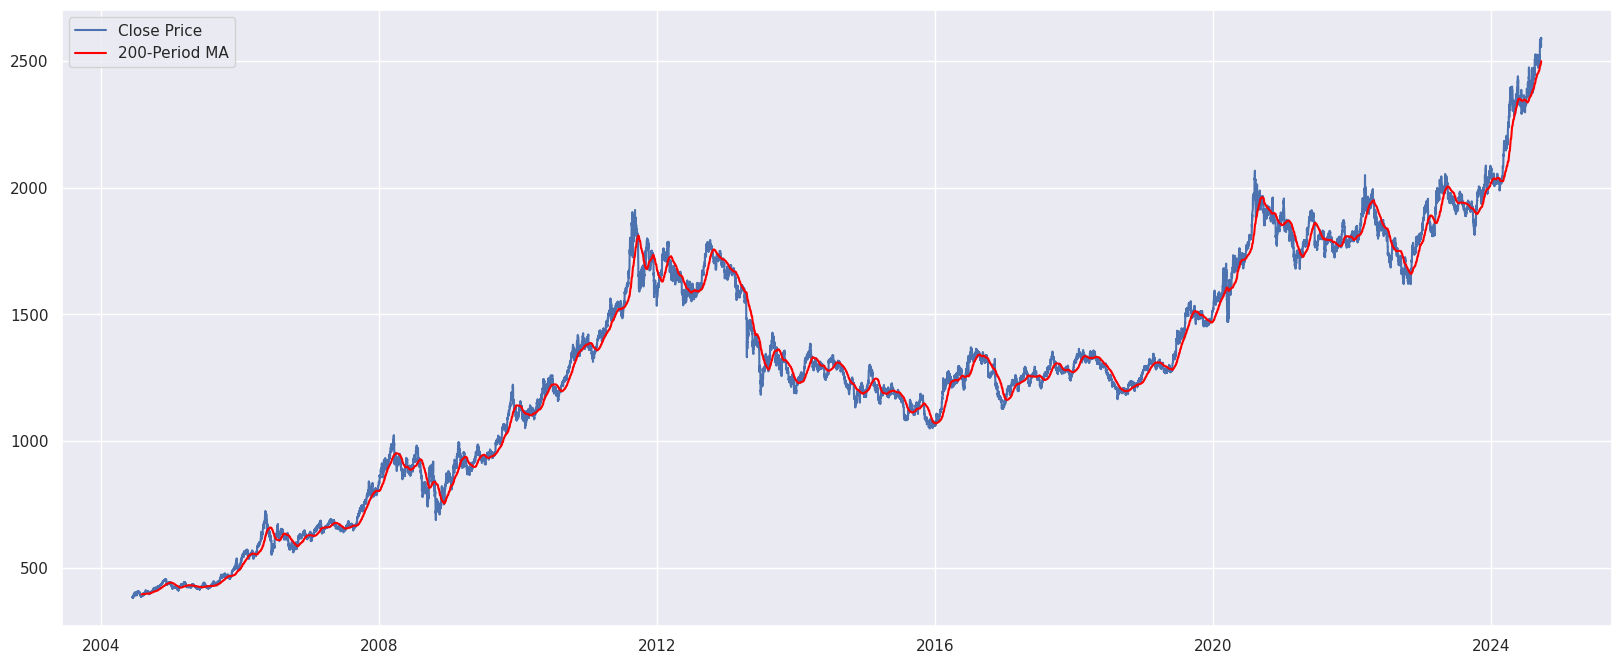

In [87]:
plt.figure(figsize=(20, 8))
data['Moving_Avg_200'] = data['Close'].rolling(window=200).mean()
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Moving_Avg_200'], label='200-Period MA', color='red')
plt.legend()
#plt.grid()
plt.show()

## 12. Pairwise scatterplots of all the selected features

#### We explore the pairwise scatterplots of the selected features from the Gold/USD dataset, including Open, High, Low, Close, Volume, Moving_Avg_50, and Moving_Avg_200. The purpose of these visualisations is to understand the relationships between these variables and identify any patterns or correlations that may exist.

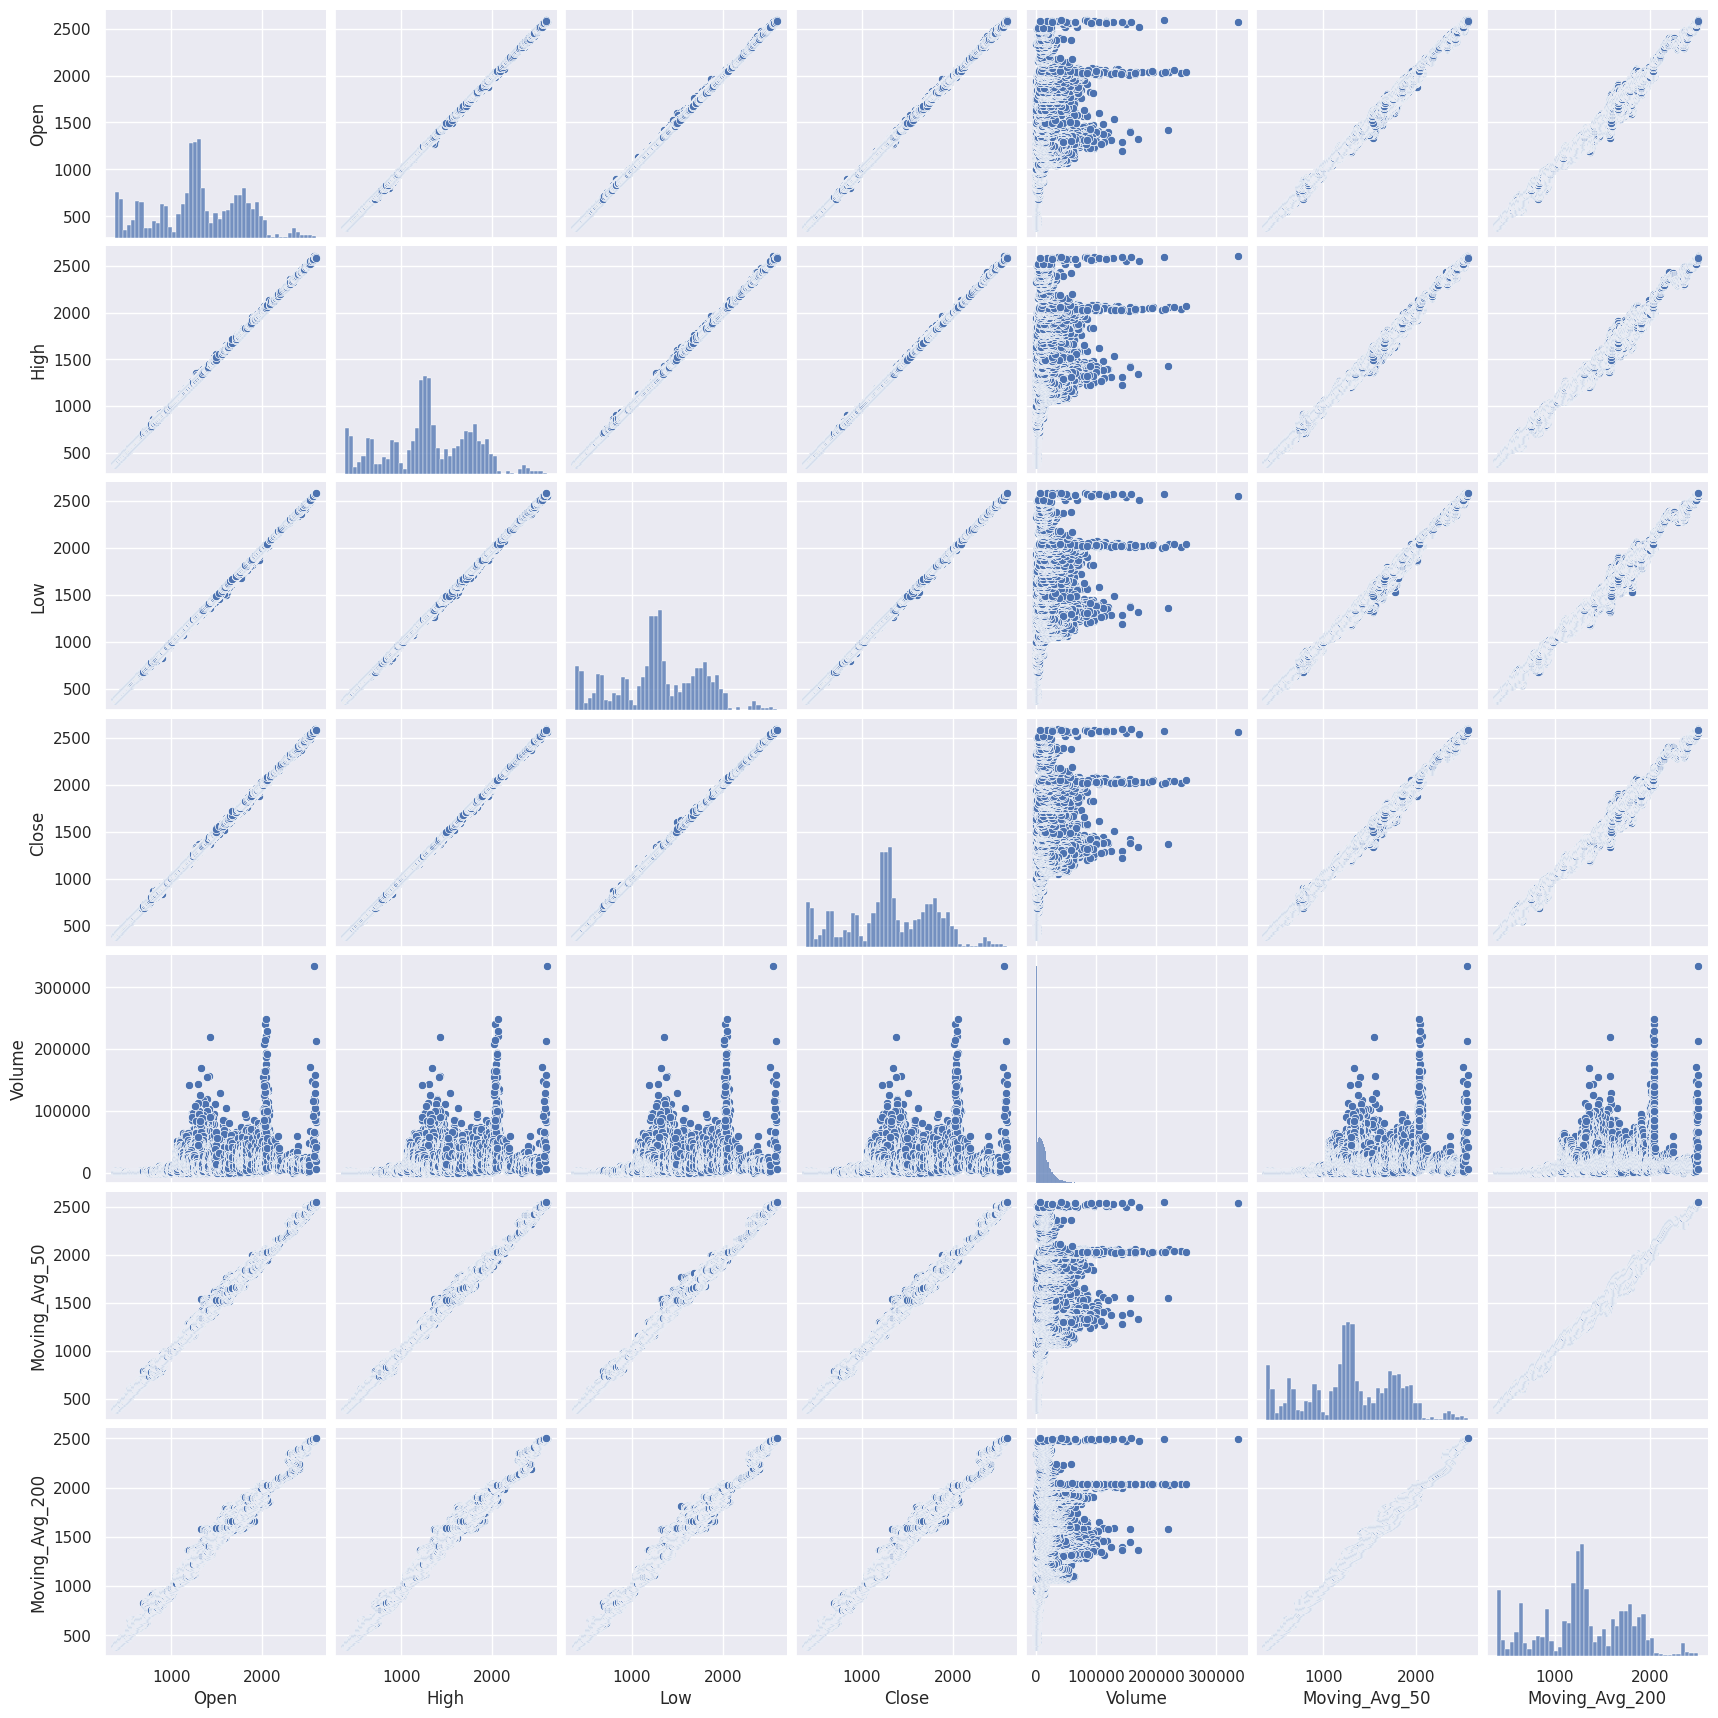

In [88]:
# Import necessary libraries
sns.set()

# Define the relevant columns for your analysis (similar to 'SalePrice')
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Moving_Avg_50', 'Moving_Avg_200']

# Create pairplot for these columns
sns.pairplot(data[cols], height=2.5)
plt.show()

## 13. Seasonality/Time Series Decomposition

#### For time series data, decomposition allows us to break down the data into trend, seasonality, and residual components to see underlying patterns. Which is useful for identifying any repeating seasonal patterns in the data, such as yearly price cycles.

<Figure size 2000x800 with 0 Axes>

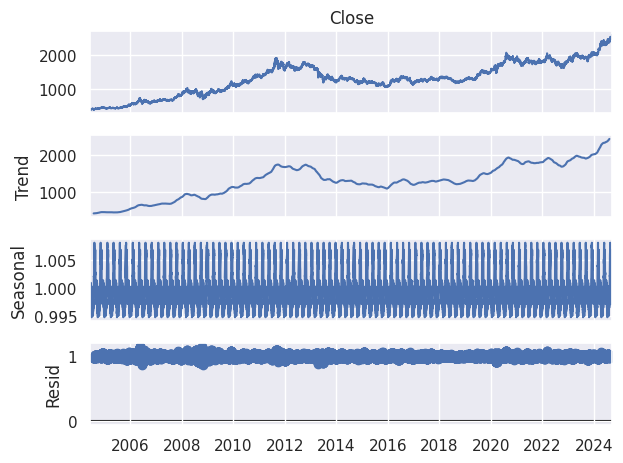

In [89]:
plt.figure(figsize=(20, 8))
result = seasonal_decompose(data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

## Summary of Insights

#### 1. The notebook performs Exploratory Data Analysis (EDA) on a Gold/USD dataset to understand price trends, volatility, and potential patterns.
#### 2. The dataset is from Kaggle and contains historical Gold/USD price data across multiple timeframes. The notebook focuses on the 4-hour timeframe.
#### 3. The notebook uncovered insights related to general price trends, volume spikes, correlations between price variables, outliers, and seasonality.